In [22]:

import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Train/test split
from sklearn.model_selection import train_test_split

# Tools for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics and plots
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

plt.rcParams["figure.figsize"] = (8, 5)


In [23]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()



(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing values per column:

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


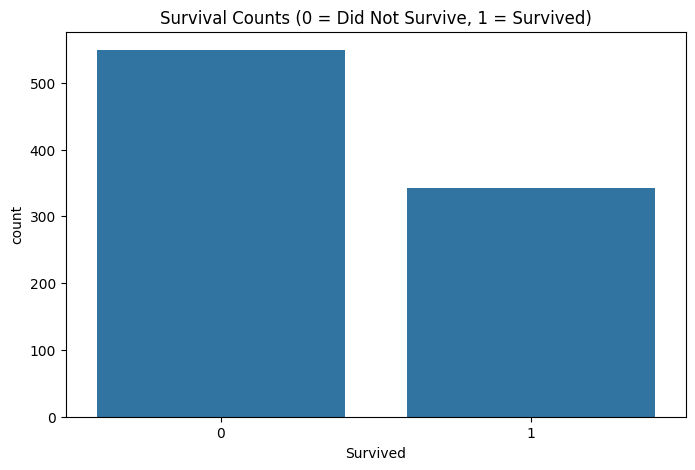

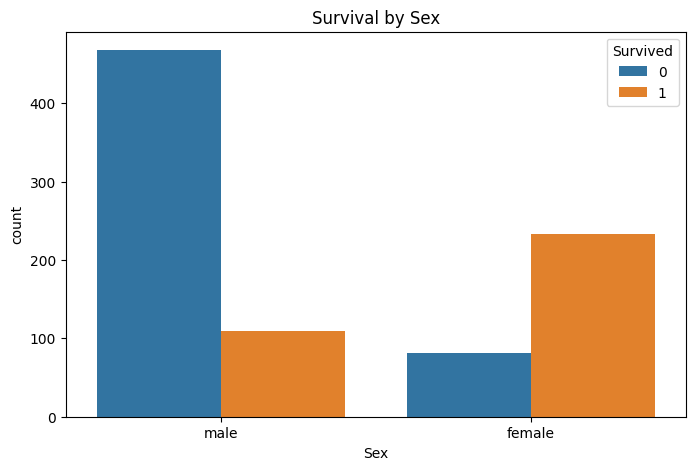

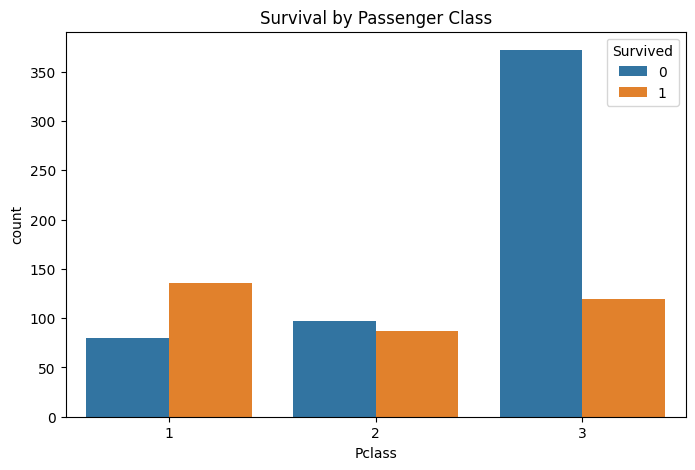

In [25]:
# Checking how many missing values exist in each column
print("Missing values per column:\n")
print(df.isna().sum().sort_values(ascending=False))

# Plot overall survival counts
sns.countplot(x="Survived", data=df)
plt.title("Survival Counts (0 = Did Not Survive, 1 = Survived)")
plt.show()

# Plot survival outcomes by sex
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

# Plot survival outcomes by passenger class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


In [26]:
# Defining the input features used for prediction

features = ["Pclass", "Sex", "Age", "Fare", "Embarked"]

# X contains the predictor variables
X = df[features]

# y contains the target variable (0 = no, 1 = yes)
y = df["Survived"]

# Verifying feature names and preview data
print("Selected features:", features)
X.head()


Selected features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']


,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [27]:
# Spliting the data into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Print the size of each split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (712, 5)
Test set size: (179, 5)


In [31]:
# Identifying numeric and categorical columns
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Embarked", "Pclass"]

# Numeric preprocessing:

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical preprocessing:

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])
